<a href="https://colab.research.google.com/github/it-ces/Analytics-puj/blob/main/Work1_analytics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/it-ces/Analytics-puj.git
#%cd "Analytics-puj"
#%env OMP_NUM_THREADS = 4

In [2]:
import pandas as pd
import numpy as np
import Models2 as Models
import EDA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df  = pd.read_csv("https://raw.githubusercontent.com/it-ces/Analytics-puj/main/03%20CSV%20data%20--%20STC(A)_numerical%20dates.csv")
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


In [4]:
# Missign values...
df.isna().sum()

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [5]:
df.dropna(inplace=True)

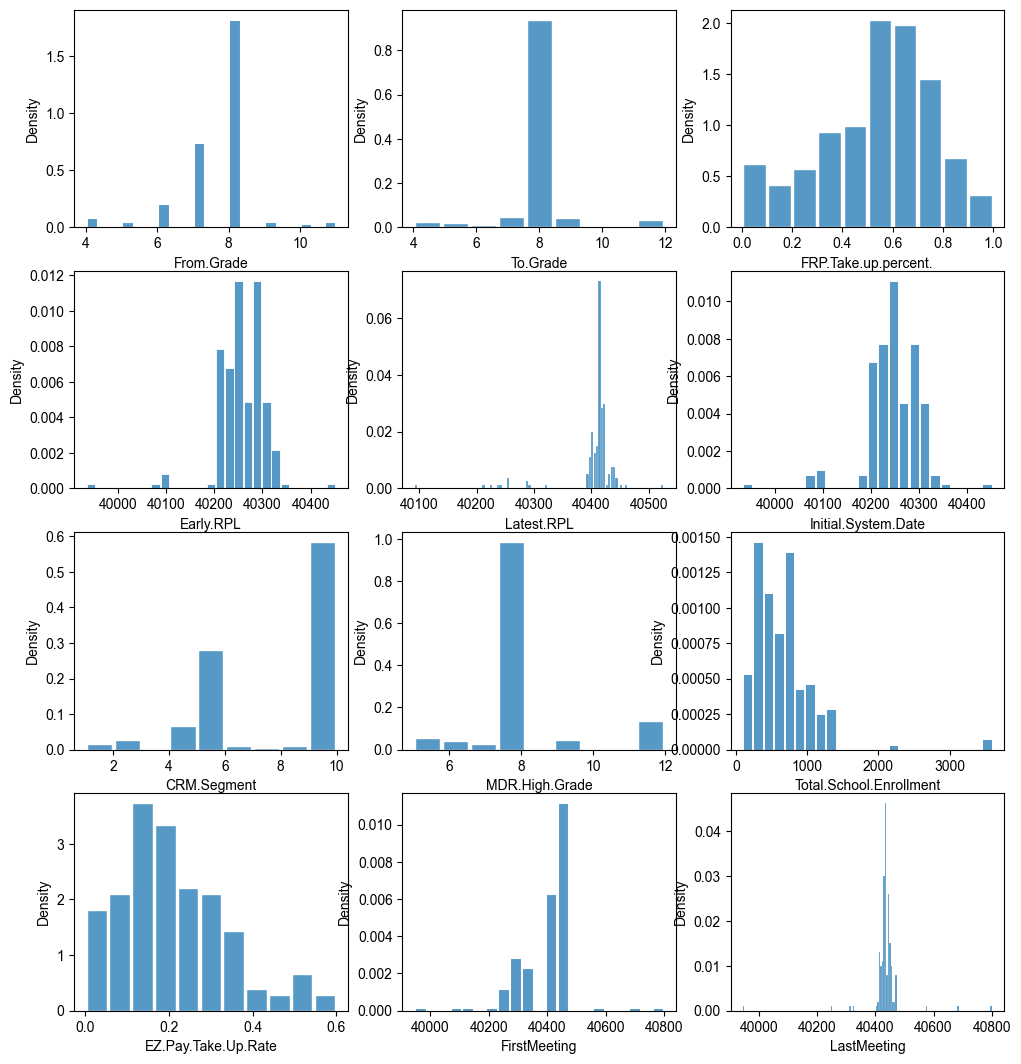

In [6]:
EDA.histogram_plot(df)

{0: 'From.Grade', 1: 'To.Grade', 2: 'FRP.Take.up.percent.', 3: 'Early.RPL', 4: 'Latest.RPL', 5: 'Initial.System.Date', 6: 'CRM.Segment', 7: 'MDR.High.Grade', 8: 'Total.School.Enrollment', 9: 'EZ.Pay.Take.Up.Rate', 10: 'FirstMeeting', 11: 'LastMeeting'}


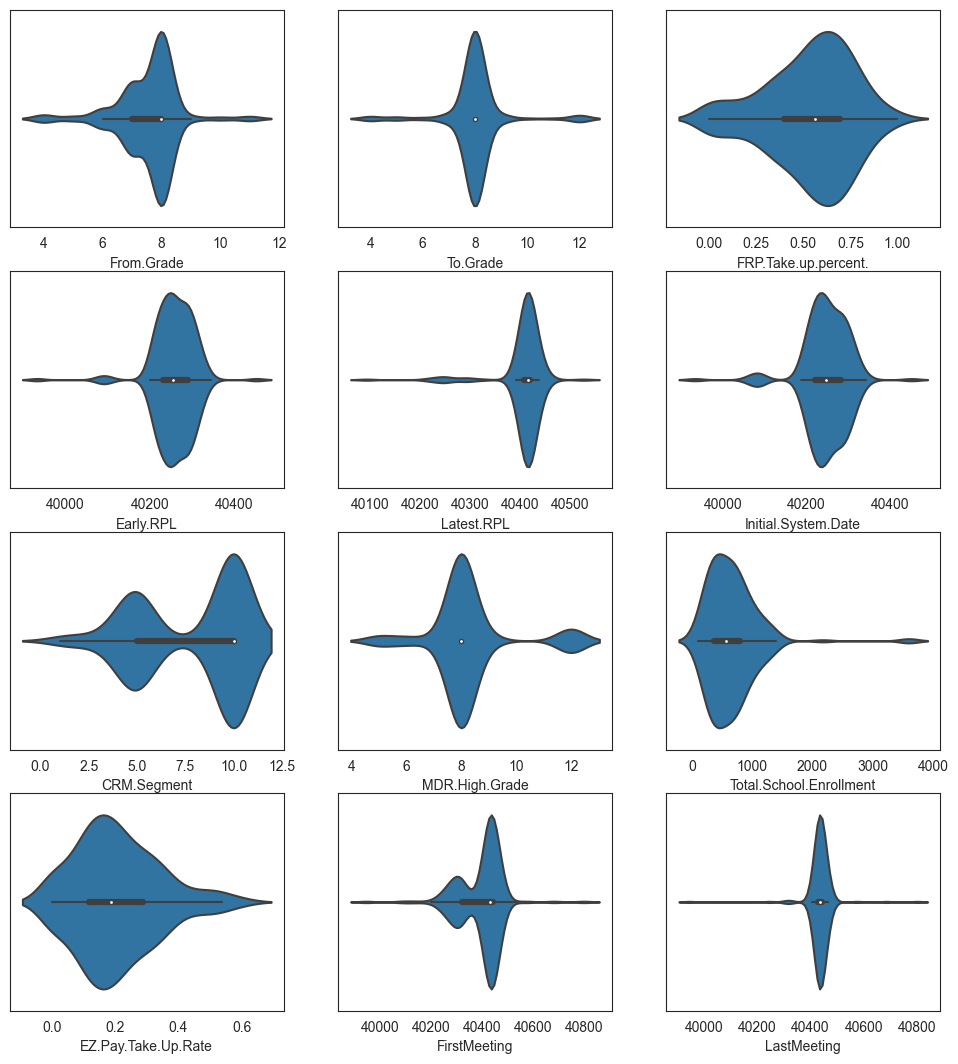

In [7]:
EDA.violins(df)

In [8]:
# Modelling
y,X =  df['Retained.in.2012.'] , df.drop(columns = 'Retained.in.2012.')
X = df[["FPP.to.PAX"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

In [9]:
#########################
# KNN modellíng         #
#########################
#Maximizar ambas clases
best_model = Models.grid_KNN(X_train, y_train, 'roc_auc')
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))


# Máximizar la clase 1
best_model = Models.grid_KNN(X_train, y_train, 'recall')
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))



####################################
#      Support vector machine      # 
####################################

#Maximizar ambas clases
best_model = Models.grid_SVC(X_train, y_train, 'roc_auc')
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))



best_modelSVC = Models.grid_SVC(X_train, y_train,'recall')
preds = best_modelSVC.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.74      0.82      0.78        28

    accuracy                           0.67        39
   macro avg       0.56      0.55      0.55        39
weighted avg       0.64      0.67      0.65        39

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.73      0.96      0.83        28

    accuracy                           0.72        39
   macro avg       0.61      0.53      0.49        39
weighted avg       0.66      0.72      0.64        39



c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        28

    accuracy                           0.72        39
   macro avg       0.36      0.50      0.42        39
weighted avg       0.52      0.72      0.60        39

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        28

    accuracy                           0.72        39
   macro avg       0.36      0.50      0.42        39
weighted avg       0.52      0.72      0.60        39



c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

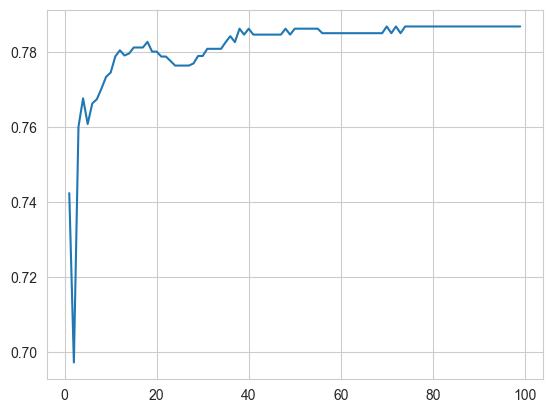

In [10]:
results_  = Models.grid_KNN(X_train, y_train, performance_metric='f1', resultsGrid=True)
fix_parameters = {'weights':'distance'}
X,perfs = Models.Plot_parameter_score(results_, fix_parameters, 'n_neighbors')
plt.plot(X,perfs)

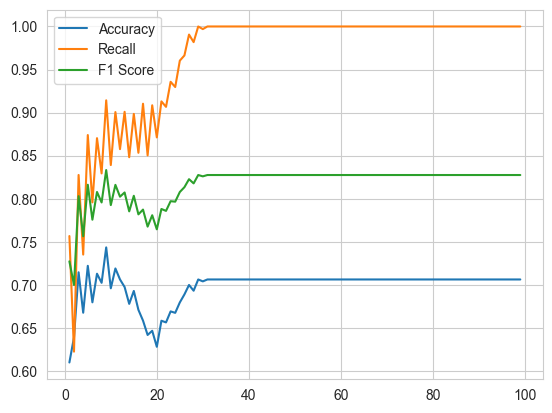

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

scores = {}
for n in range(1,100):
    classifier =  KNeighborsClassifier(n_neighbors=n)
    scores[n] = Models.mean_scores_kfold(classifier,X_train,y_train)
x_axis, accuracy_, recalls, f1s = [], [],[],[]
for i in scores:
  x_axis.append(i)
  accuracy_.append(scores[i][0])
  recalls.append(scores[i][1])
  f1s.append(scores[i][2])
plt.plot(x_axis, accuracy_, label='Accuracy')  # Add label for legend
plt.plot(x_axis, recalls, label='Recall')  # Add label for legend
plt.plot(x_axis, f1s, label='F1 Score')  # Add label for legend
# Adding legends
plt.legend()

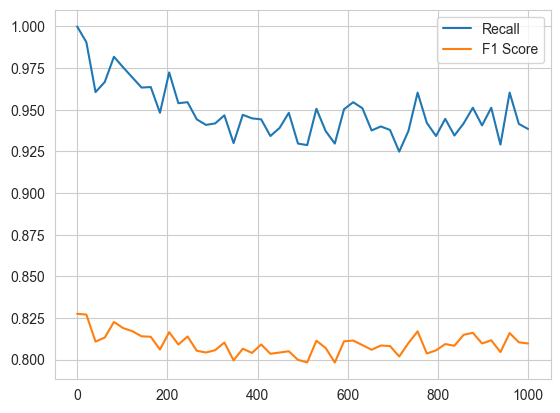

In [12]:
from sklearn.svm import SVC

scores = {}
for c in np.linspace(0.00001, 1000, 50):
    classifier =  SVC(C=c)
    scores[c] = Models.mean_scores_kfold(classifier,X_train,y_train)
x_axis, accuracy_, recalls, f1s = [], [],[],[]
for i in scores:
  x_axis.append(i)
  accuracy_.append(scores[i][0])
  recalls.append(scores[i][1])
  f1s.append(scores[i][2])
#plt.plot(x_axis, accuracy_, label='Accuracy')  # Add label for legend
plt.plot(x_axis, recalls, label='Recall')  # Add label for legend
plt.plot(x_axis, f1s, label='F1 Score')  # Add label for legend
# Adding legends
plt.legend()

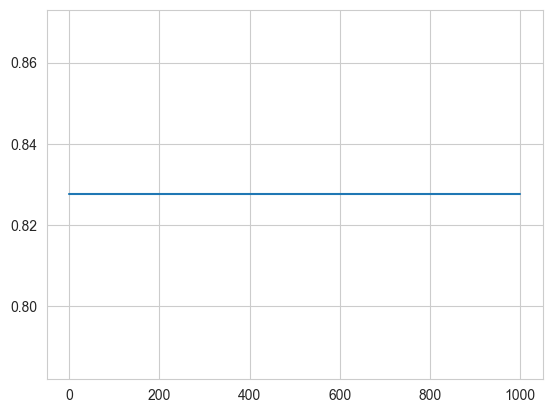

In [13]:
results_  = Models.grid_SVC(X_train, y_train, performance_metric='f1', resultsGrid=True)
fix_parameters = {'gamma':'scale', 'kernel':'linear'}
X,perfs = Models.Plot_parameter_score(results_, fix_parameters, 'C')
plt.plot(X,perfs)

In [14]:
len(X)

20

In [15]:
len(perfs)

20